In [30]:
import numpy as np
import pandas as pd
import nltk
import string
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(string.punctuation)
stopwords.append('')
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
cleaned = pd.read_csv('cleaned_hm.csv')
cleaned=cleaned.head(5000) # For Testing purposes
demographic = pd.read_csv('demographic.csv')
nolist = ['happy', 'day', 'got', 'went', 'today', 'made', 'one', 'two', 'time', 'last', 'first', 'going',
'getting', 'took', 'found', 'lot', 'really', 'saw', 'see', 'month', 'week', 'day', 'yesterday',
'year', 'ago', 'now', 'still', 'since', 'something', 'great', 'good', 'long', 'thing', 'toi', 'without',
'yesteri', '2s', 'toand', 'ing', 'got', 'came', 'could', 'happiness', 'new', 'able', 'finally', 'like',
'old', 'years', 'many', '2', 'get', 'taj', 'nice', 'top', 'back']

cleaned = pd.merge(cleaned, demographic, on='wid')
cleaned.drop('age', axis=1, inplace=True)

In [9]:
#To remove all punctuation and stopwords
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)   
    return [word for word in nopunc.split()
    if ((word.lower() not in stopwords) & (word.lower() not in nolist))]
cleaned['cleaned_hm'] = cleaned['cleaned_hm'].apply(text_process) #Sample of 10,000 rows
cleaned.head(1)

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,country,gender,marital,parenthood
0,27673,2053,24h,I went on a successful date with someone I fel...,"[successful, date, someone, felt, sympathy, co...",True,1,NaN,affection,USA,m,single,n


In [13]:
for i in range(0, len(cleaned)):
    cleaned['cleaned_hm'][i] = ' '.join(cleaned['cleaned_hm'][i])

C:\Users\mayan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(-0.5, 3999.5, 2199.5, -0.5)

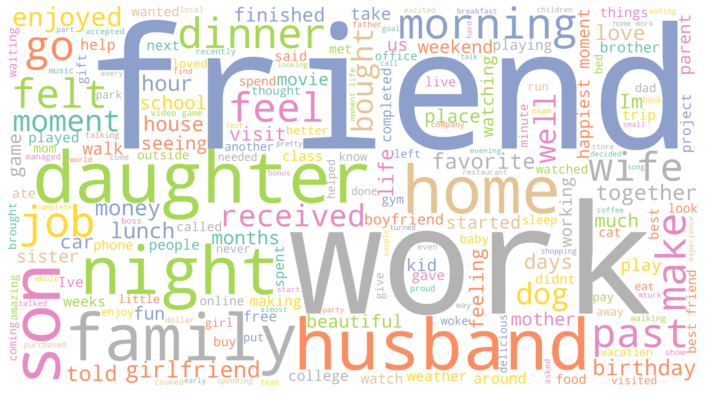

In [18]:
text = ' '.join(cleaned['cleaned_hm'].tolist())
wordcloud = WordCloud(background_color="white", height=2200, width=4000).generate(text)
plt.figure( figsize=(18,7) )
plt.imshow(wordcloud.recolor(colormap=plt.get_cmap('Set2')), interpolation='bilinear')
plt.axis("off")

In [21]:
k = 8
# Extract unique values of predicted_category and add to a list in descending orders (by count of responses)
pivot_category = pd.pivot_table(cleaned, values='hmid',index=cleaned.iloc[:,k], aggfunc='count')
pivot_category.sort_values('hmid', axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last')
Category_labels =pivot_category.T.columns.tolist()
if len(Category_labels)>10:
    Category_labels = Category_labels[0:9]
Category_labels

['achievement',
 'affection',
 'bonding',
 'enjoy_the_moment',
 'leisure',
 'nature',
 'exercise']

In [24]:
j=1
text = ' '.join(cleaned[cleaned.iloc[:,k]==Category_labels[j]]['cleaned_hm'].tolist())

In [25]:
text

'successful date someone felt sympathy connection son 90 marks examination family brings beautiful gift family cooked favorite food night son recovery disease mother finalized stay transfer abroad husband passed DOT physical dont worry anymore husband started working hours cut baby started sleeping night sleeping night several months fiance Magic Gathering cards brother throw brought home Nintendo Switch birthday Ive spending free playing video games fiance started planning wedding grandchildren butterfly display Crohn Conservatory lunch daughter grandchildren enjoyed together vacation plans daughter Florida July met parents difficult dog hardly ever listens decided come called gift elder brother surprising cousin brother awarded shortfilm GO THEATRE MAKE FAMILY moms birthday celebration wedding celebration dad birthday celebration enjoyed past friends family come home celebrate party Watching cupcake wars three teen children children kissing goodnight husband kissing hello girlfriend 

In [27]:
str = text.split()         
str2 = []
str3 = pd.DataFrame([['A','B']], [Category_labels[j]], ['Word','Frequency'])
 
# Check for duplicate by looping until string values is not present in str
for word in str:
    if (word not in str2) & ((word+'s') not in str2):
        str2.append(word) # insert value in str2

# Create dataframe to store and report results
str3.iloc[0][0]=str2[0]
str3.iloc[0][1]=str.count(str2[0]) / len(text)
for i in range(1, len(str2)):
    # count the frequency of each word(present # in str2 and add with word to DataFrame
    freq = str.count(str2[i]) / len(text)
    str4 = pd.DataFrame([[str2[i],freq]], [Category_labels[j]], ['Word','Frequency'])
    str3 = str3.append(str4)  

str3.sort_values(by = 'Frequency', ascending=False, inplace=True)
str4 = str3.head(10)

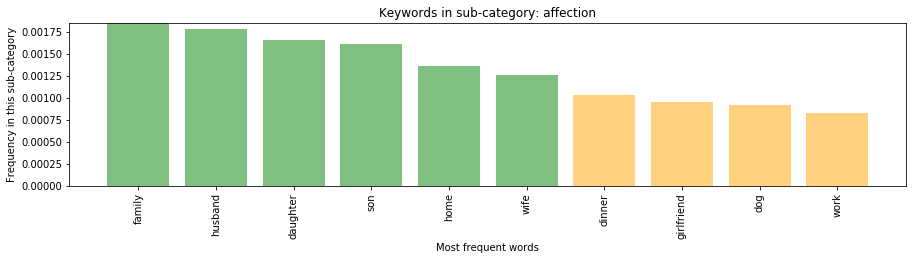

In [28]:
objects = str4['Word']
x_pos = np.arange(len(objects))   
plt.figure(figsize=(15,3))
colors = tuple(np.where(str4['Frequency']>(0.66*str4['Frequency'].max()), 'g', 'orange'))
plt.bar(x_pos, str4['Frequency'], align='center', alpha=0.5,
         color=colors)
plt.ylim(0, str4['Frequency'].max())
plt.xticks(x_pos, objects, rotation=90)
plt.xlabel('Most frequent words')
plt.ylabel('Frequency in this sub-category')
#for i, v in enumerate(str4['Frequency']):
#plt.text(1, i, str(v), color='black', bbox=dict(facecolor='white', alpha=0.5))
plt.title('Keywords in sub-category: {}'.format(Category_labels[j]))
plt.show()

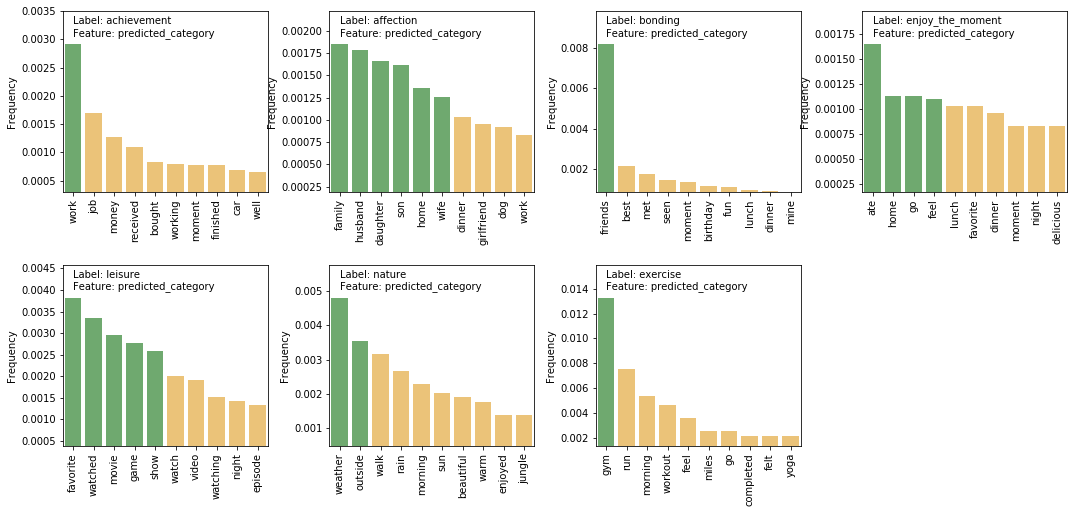

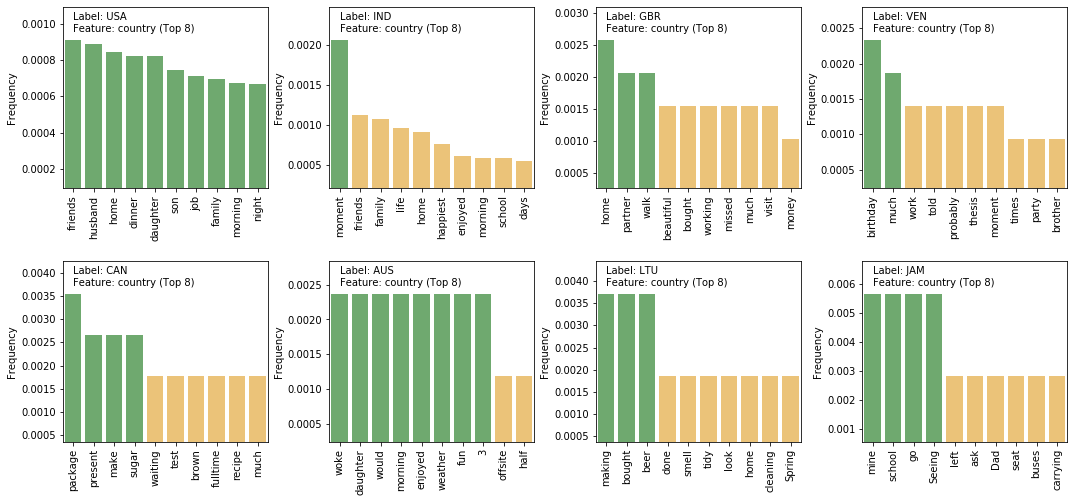

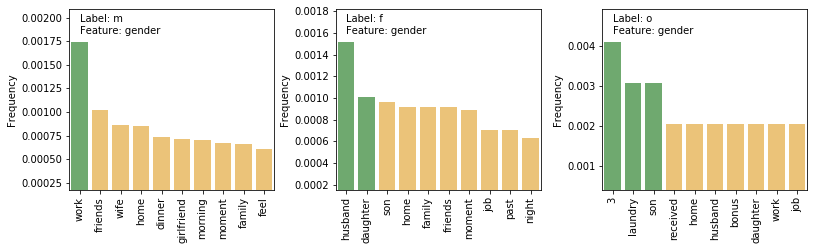

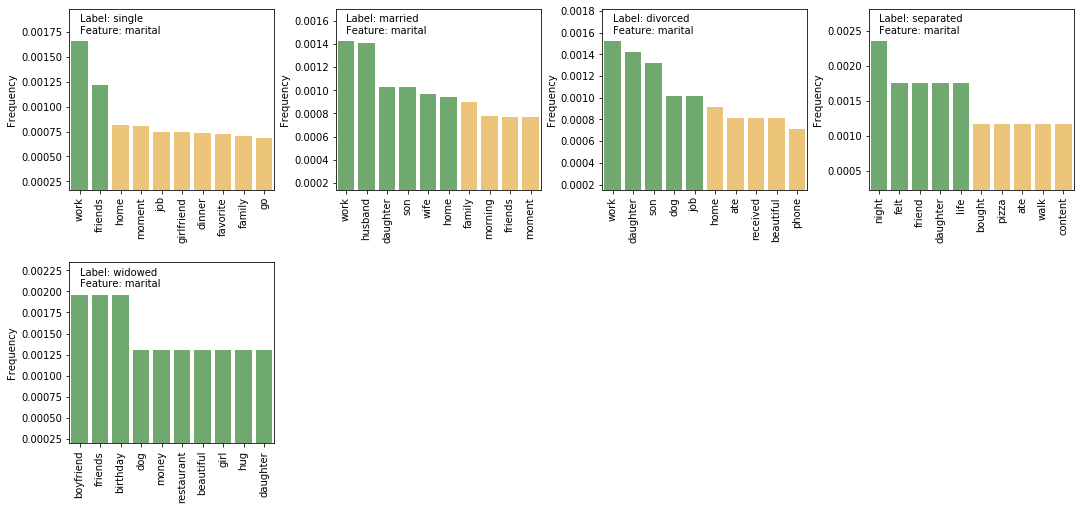

In [31]:
for k in range(8, 12): # Feature k
    
    # Extract unique values of predicted_category and add to a list in descending orders (by count of responses)
    pivot_category = pd.pivot_table(cleaned, values='hmid',index=cleaned.iloc[:,k], aggfunc='count')
    pivot_category.sort_values('hmid', axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last')
    Category_labels =pivot_category.T.columns.tolist()
    add_title = ''
    if len(Category_labels)>10:
        Category_labels = Category_labels[0:8]
        add_title = '(Top 8)'

    j = 0 # Labels j for selected features
    str5={0:[]}
    fig = plt.figure(figsize=(18, 8))
    plt.title('Feature: '+cleaned.columns[k])
    fig.subplots_adjust(hspace=0.4, wspace=0.3)

    #fig, axis = plt.subplots(1,len(Category_labels),figsize=(18,3))
    for j in range(0, len(Category_labels)):
        l=j+1
        text = ' '.join(cleaned[cleaned.iloc[:,k]==Category_labels[j]]['cleaned_hm'].tolist())
        str = text.split()         
        str2 = []
        str3 = pd.DataFrame([['A','B']], [Category_labels[j]], ['Word','Frequency'])
    
    # Check for duplicate by looping until string values is not present in str
        for word in str:
            if (word not in str2) & ((word+'s') not in str2):
                str2.append(word) # insert value in str2

    # Create dataframe to store and report results
        str3.iloc[0][0]=str2[0]
        str3.iloc[0][1]=str.count(str2[0]) / len(text)
        for i in range(1, len(str2)):
            # count the frequency of each word(present # in str2 and add with word to DataFrame
            freq = str.count(str2[i]) / len(text) 
            str4 = pd.DataFrame([[str2[i],freq]], [Category_labels[j]], ['Word','Frequency'])
            str3 = str3.append(str4)  

        str3.sort_values(by = 'Frequency', ascending=False, inplace=True)
        str4 = str3.head(10)
        str5.update({j: str4}) #add result to the list str 5 to create graphs in next section 
    
        # Graphing
        plt.subplot(2, 4, l)
        objects = str5[j]['Word']
        x_pos = np.arange(len(objects))   
        colors = tuple(np.where(str5[j]['Frequency']>(0.66*str5[j]['Frequency'].max()), 'g', 'orange'))
        sns.barplot(x=x_pos, y=str5[j]['Frequency'], palette=colors, alpha=0.6, data=cleaned);
        plt.text(0, (str5[j]['Frequency'].max()*1.05), 'Label: ' + Category_labels[j]
        +'\nFeature: '+cleaned.columns[k]+' '+add_title)
        plt.ylim((str5[j]['Frequency'].max()*0.1), (str5[j]['Frequency'].max()*1.2))
        plt.xticks(x_pos, objects, rotation=90)

plt.show()